# Challenge Deep Learning

L'objectif de ce challenge est de proposer une méthode de classification, basée sur des réseaux de neurones, permettant de classer des images issues de Google Quickdraw (https://quickdraw.withgoogle.com/data).
Le jeu de données proposé comprend 5 classes balancées, avec 15000 exemples d'apprentissage, 10000 exemples de test et 5000 exemples de validation : des paniers, des yeux, des lunettes, des lapins et des mains.

Vous pouvez utiliser tout algorithme qui vous semble pertinent (PMC, CNN,), en faisant varier les données d'entrée (normalisation, augmentation de données,...), les paramètres des réseaux considérés (fonction objectif, optimiseur, dropout, learning rate, taille des batchs...)

Bien sûr, pour valider votre travail, nous ferons tourner le code en local, sur la base originale que nous conservons, pour voir si les résultats que vous proposez sont reproductibles. 

Le compte-rendu sera effectué sur un notebook jupyter, dans lequel vous reporterez votre méthodologie en markdown, et vos codes en Python. Vous expliquerez votre démarche, justifierez vos choix, commenterez vos expérimentations et vos résultats.

La notation sera construite de la manière suivante : 
- 12 points sur le compte-rendu
- 8 points seront accordés sur un classement par le taux de reconnsaissance des objets de la base de test. Les binômes seront classés par taux de reconnaissance décroissant, les premiers ayant 8 points accordés, les autres binômes ayant une note suivant une décroissance linéaire.

Le notebook sera déposé sur la plateforme moodle du cours.

## Imports

In [144]:
import tensorflow.keras
import pandas as pd
import numpy as np
import time
from PIL import Image
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Ajouter les imports nécessaires


## Données

In [145]:
classes = ["basket","eye","binoculars","rabbit","hand"]
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
valid = pd.read_csv('valid.csv')

In [146]:
train.head()

image_name             relative_path  class_label
0  basket_052681.png  basket/basket_052681.png            0
1  basket_028248.png  basket/basket_028248.png            0
2  basket_050738.png  basket/basket_050738.png            0
3  basket_034414.png  basket/basket_034414.png            0
4  basket_091738.png  basket/basket_091738.png            0

## Dataprocessing

In [147]:
train_dir = './png-files/' + train.relative_path
test_dir = './png-files/' + test.relative_path
valid_dir = './png-files/' + valid.relative_path

In [148]:
# train_dir.head()

In [149]:
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from numpy import load

In [150]:
# # Processing for train data 
# train_img = list()
# test_img, = list()
# valid_img = list()

In [151]:
# train_labels = train.class_label
# test_labels = test.class_label
# valid_labels = valid.class_label

In [152]:
# for file in train_dir:
#     out = load_img(file, color_mode = "grayscale")
#     out = img_to_array(out)
#     train_img.append(out)
    
# for file in test_dir:
#     out = load_img(file, color_mode = "grayscale")
#     out = img_to_array(out)
#     test_img.append(out)
    
# for file in valid_dir:
#     out = load_img(file, color_mode = "grayscale")
#     out = img_to_array(out)
#     valid_img.append(out)

In [153]:
# # convert to a numpy arrays
# train_img = np.asarray(train_img)
# train_labels = np.asarray(train_labels)

# test_img = np.asarray(test_img)
# test_labels = np.asarray(test_labels)

# valid_img = np.asarray(valid_img)
# valid_labels = np.asarray(valid_labels)

In [154]:
# print("The train set shape is : ", train_img.shape)
# print("The test set shape is : ", test_img.shape)
# print("The valid set shape is : ", valid_img.shape)

# // load and save

In [155]:
# # save the reshaped photos
# np.save('train_img.npy', train_img)
# np.save('train_labels.npy', train_labels)

# np.save('test_img.npy', test_img)
# np.save('test_labels.npy', test_labels)

# np.save('valid_img.npy', valid_img)
# np.save('valid_labels.npy', valid_labels)

In [156]:
# load and confirm the shape

train_img = np.load('train_img.npy')
train_labels = np.load('train_labels.npy')

test_img = np.load('test_img.npy')
test_labels = np.load('test_labels.npy')

valid_img = np.load('valid_img.npy')
valid_labels = np.load('valid_labels.npy')

## Normalizarion 

In [157]:
train_img = train_img.astype('float32') / 255
test_img = test_img.astype('float32') / 255
valid_img = valid_img.astype('float32') / 255

In [158]:
train_img.shape

(75000, 28, 28, 1)

In [159]:
train_labels.shape

(75000,)

### Transformation to catégorical 

In [160]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
valid_labels = to_categorical(valid_labels)

## Construction du Modèle

In [161]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [162]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_17 (Dense)             (None, 5)                

In [163]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Apprentissage

In [164]:
np.random.seed(12345)

In [165]:
history = model.fit(train_img, train_labels, epochs=10, batch_size=200, validation_data= (valid_img, valid_labels))

Train on 75000 samples, validate on 25000 samples
Epoch 1/10
75000/75000 [==============================] - 24s 326us/sample - loss: 0.4806 - acc: 0.8411 - val_loss: 0.3090 - val_acc: 0.9016
Epoch 2/10
75000/75000 [==============================] - 25s 329us/sample - loss: 0.2596 - acc: 0.9165 - val_loss: 0.2138 - val_acc: 0.9296
Epoch 3/10
75000/75000 [==============================] - 25s 337us/sample - loss: 0.1988 - acc: 0.9343 - val_loss: 0.2062 - val_acc: 0.9320
Epoch 4/10
75000/75000 [==============================] - 26s 348us/sample - loss: 0.1656 - acc: 0.9454 - val_loss: 0.1676 - val_acc: 0.9439
Epoch 5/10
75000/75000 [==============================] - 25s 338us/sample - loss: 0.1437 - acc: 0.9521 - val_loss: 0.1655 - val_acc: 0.9436
Epoch 6/10
75000/75000 [==============================] - 25s 331us/sample - loss: 0.1253 - acc: 0.9585 - val_loss: 0.1632 - val_acc: 0.9468
Epoch 7/10
75000/75000 [==============================] - 26s 344us/sample - loss: 0.1116 - acc: 0.9618 

### Nombre d'epoch :  Affichage des courbes de loss et accuracy pendant le training

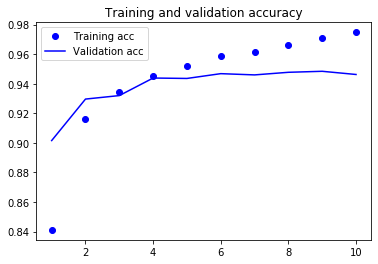

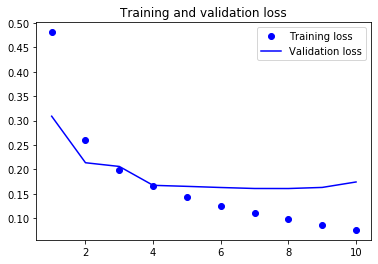

In [166]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Pas d'amélioration sur l'échantillon de validation à partir de la 5 epoch. L'échantillon d'apprentissage continue de sur-apprendre.

## Evaluation sur l'echantillon de test 

In [167]:
test_loss, test_acc = model.evaluate(test_img, test_labels)

50000/50000 [==============================] - 6s 118us/sample - loss: 0.1643 - acc: 0.9498


In [168]:
test_acc

0.94982

## Data auguementation

In [169]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [170]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

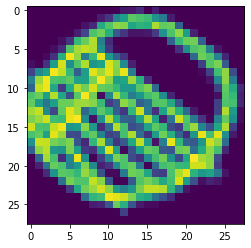

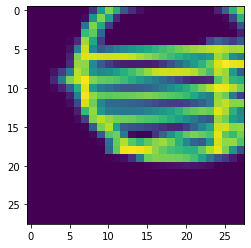

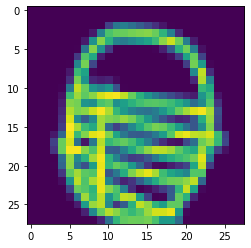

In [171]:
x = train_img[0]

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()


plt.figure(figsize=(18,9))
for i in range(0,5):
    ax= plt.subplot(3,2 ,i+1)
    im = Image.open('png-files/'+classes[i]+'/'+classes[i]+'_000000.png')
    fig=ax.imshow(im)
    plt.title(classes[i])
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
plt.show()    
